![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [11]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [12]:
# Create Dummy Variables
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=False)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [13]:
#Standardize the data
scaler = StandardScaler()
scaler.fit_transform(penguins_df)

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394,
         0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.00604235,
        -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.00604235,
        -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363, -0.99399394,
         0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.00604235,
        -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985, -0.99399394,
         0.99399394]])

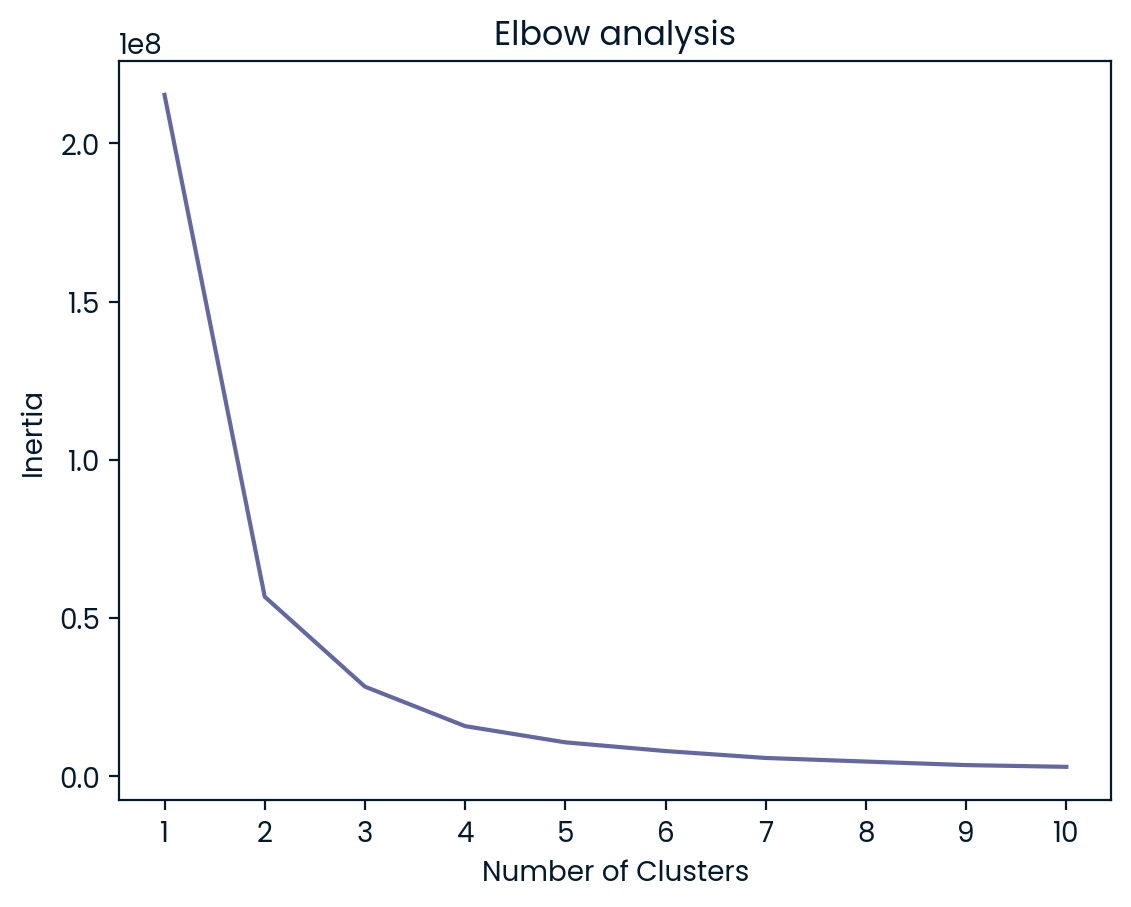

In [14]:
#Detect the optimal number of clusters using elbow analysis
inertias = []

#We will loop over 1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(penguins_df)
    inertias.append(kmeans.inertia_)
    
#plot the cluster count vs inertia graph
plt.plot(range(1, 11), inertias)
plt.title("Elbow analysis")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

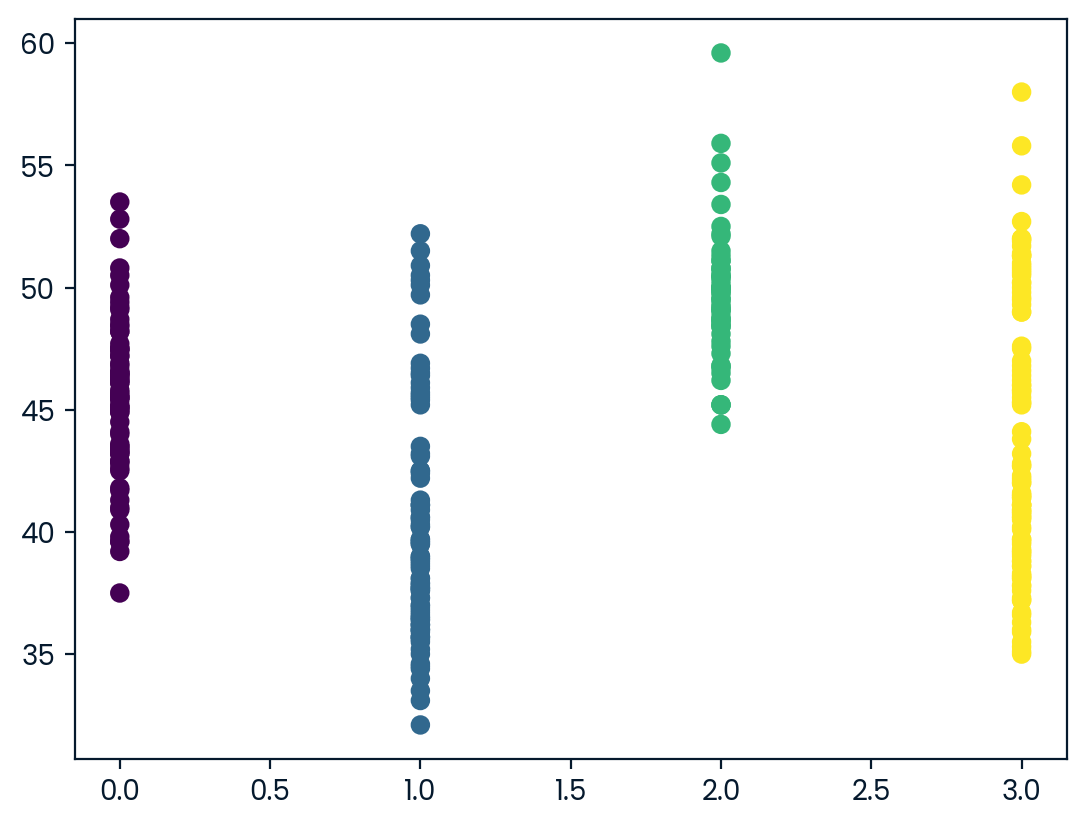

In [15]:
#We see from the plot that 4 is an optimal number of clusters
#We now run the KMeans clustering algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(penguins_df)
penguins_df['label'] = kmeans.labels_
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_)
plt.show()

In [16]:
#Let's now create the final statistical DataFrame
numeric_cols = [col for col in penguins_df.columns if penguins_df[col].dtypes != '0' and penguins_df[col].nunique() >= 4]
stat_penguins = penguins_df.groupby('label')[numeric_cols].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
label,,,,,
0,45.457895,15.661842,209.631579,4710.526316,0.0
1,40.101053,17.743158,188.557895,3327.894737,1.0
2,49.674545,15.725455,221.709091,5548.181818,2.0
3,43.570755,18.433962,195.141509,3936.320755,3.0
